In [4]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import datasets 

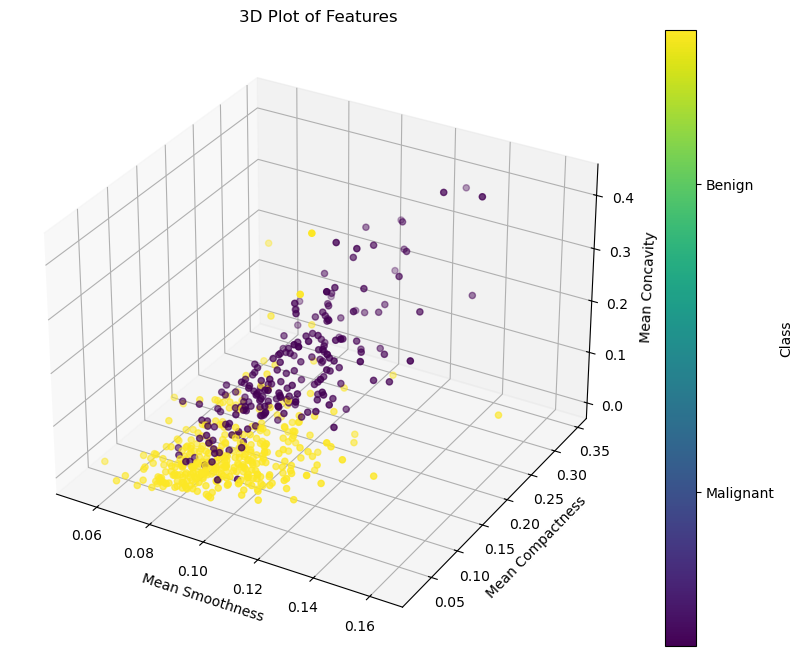

In [11]:
data = datasets.load_breast_cancer()
fullFrame = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# We will use 3 features to make a prediction 

X = fullFrame[['mean smoothness', 'mean compactness', 'mean concavity']]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
scatter=ax.scatter(X['mean smoothness'], X['mean compactness'], X['mean concavity'], c=y, cmap='viridis')
cbar = plt.colorbar(scatter, label='Class')
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['Malignant', 'Benign'])
# Set labels and title
ax.set_xlabel('Mean Smoothness')
ax.set_ylabel('Mean Compactness')
ax.set_zlabel('Mean Concavity')
ax.set_title('3D Plot of Features')
plt.show()

In [30]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
decision_tree=DecisionTreeClassifier(max_depth = 3, random_state = 50)
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)


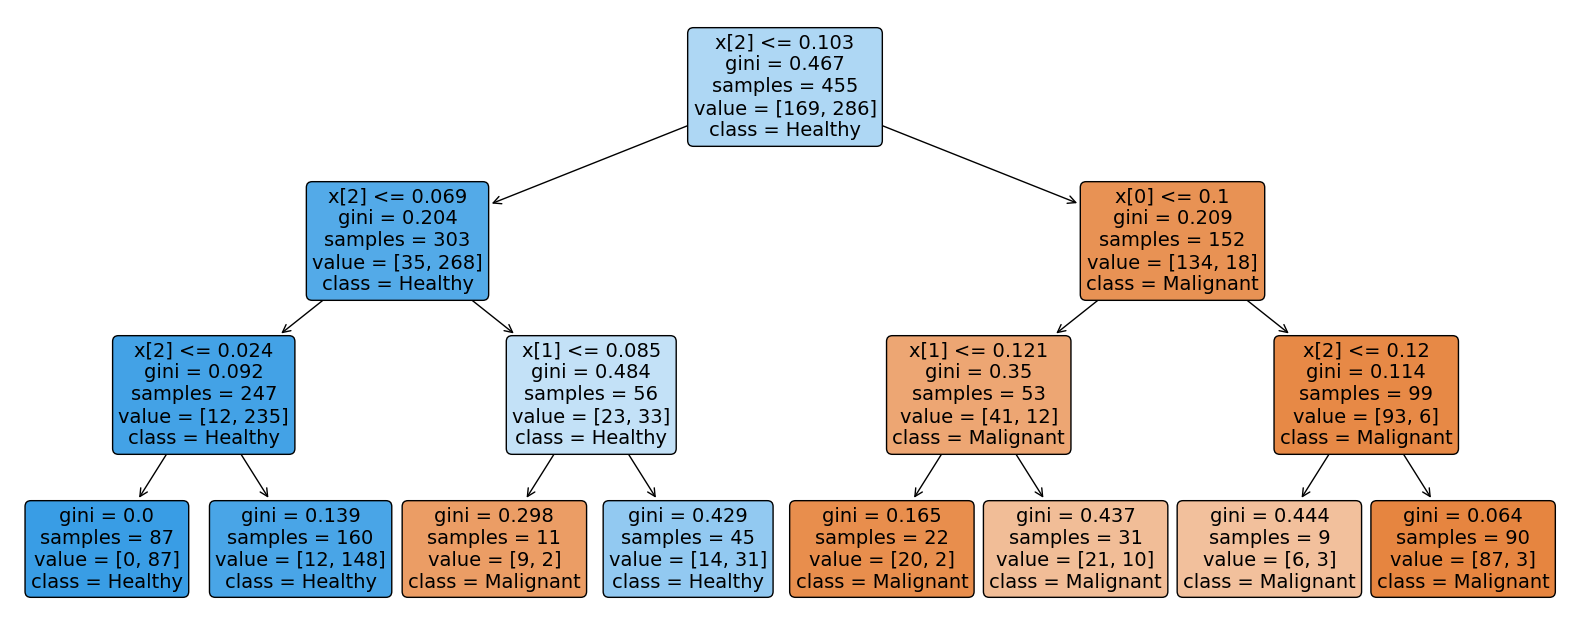

In [33]:
from sklearn import tree


features = ["mean smoothness", "mean compactness", "mean concavity"]


class_names = [ "Malignant","Healthy"]  

# Plot the decision tree
plt.figure(figsize = (20, 8))
tree.plot_tree(decision_tree,
               # feature_names=features,
               class_names = class_names,
               rounded = True,
               filled = True,
               fontsize = 14)
plt.show()

c:\Users\passa\miniconda3\envs\ml\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


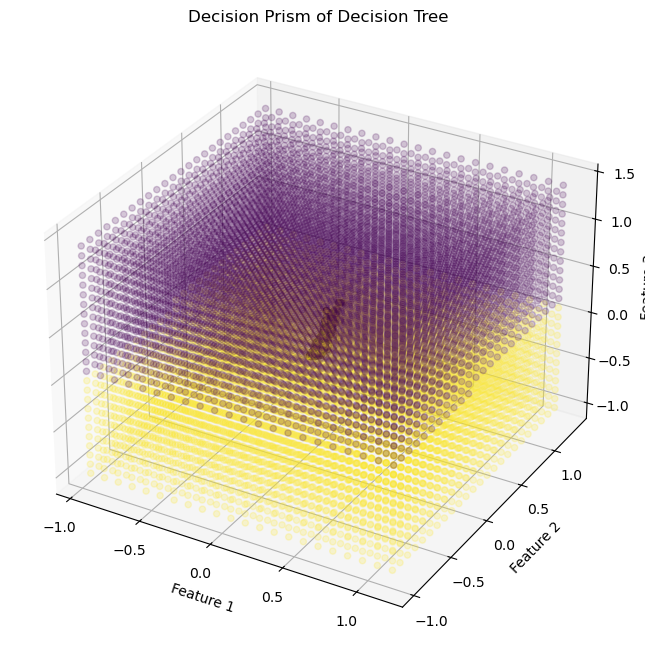

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X is a 3-column NumPy array and y is the target variable

# Create a meshgrid for the feature space
x_min, x_max = X['mean smoothness'].min() - 1, X['mean smoothness'].max() + 1
y_min, y_max = X['mean compactness'].min() - 1, X['mean compactness'].max() + 1
z_min, z_max = X['mean concavity'].min() - 1, X['mean concavity'].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1),
                         np.arange(z_min, z_max, 0.1))

# Make predictions for each point on the meshgrid
Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['mean smoothness'], X['mean compactness'], X['mean concavity'], c=y, cmap='viridis', edgecolors='k')
ax.scatter(xx, yy, zz, c=Z, cmap='viridis', alpha=0.2)

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Decision Prism of Decision Tree')

plt.show()


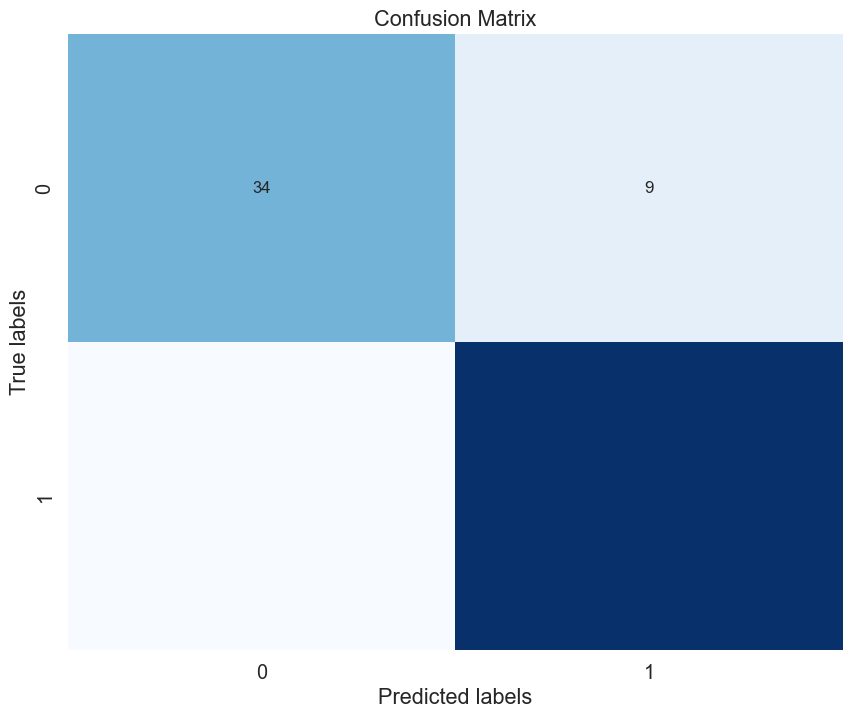

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 12})
sns.set(font_scale=1.3)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [49]:
conf_matrix # for some reason the bottom labels won't show up :( 

array([[34,  9],
       [ 3, 68]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
print(f"accuracy score={accuracy_score(y_test,y_pred)}")

accuracy score=0.8947368421052632


In [57]:
# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get the index of the most important feature
most_important_feature_index = np.argmax(feature_importances)

# Get the name of the most important feature
most_important_feature_name = X_train.columns[most_important_feature_index]

print("Most important feature:", most_important_feature_name)

Most important feature: mean concavity


## Results

Our decision tree model, trained on three key features—mean smoothness, mean compactness, and mean concavity—has demonstrated impressive predictive accuracy in distinguishing between malignant and benign tumors. With an accuracy of 89%, the model effectively identifies the nature of tumors based on these features.

Interestingly, upon analysis of feature importance, we discovered that mean concavity emerged as the most influential feature in the decision-making process of the tree. This underscores the significance of concavity in tumor classification, suggesting that deviations in this metric play a crucial role in determining the malignancy of tumors.

Through this analysis, our decision tree model not only provides accurate predictions but also sheds light on the importance of specific features in tumor characterization, contributing to our understanding of breast cancer diagnosis.
